In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_read=zipfile.ZipFile('/content/drive/MyDrive/archive.zip',mode='r')
name = zip_read.namelist()
pgm_imgs=name[1:]
print(pgm_imgs)

['s1/1.pgm', 's1/10.pgm', 's1/2.pgm', 's1/3.pgm', 's1/4.pgm', 's1/5.pgm', 's1/6.pgm', 's1/7.pgm', 's1/8.pgm', 's1/9.pgm', 's10/1.pgm', 's10/10.pgm', 's10/2.pgm', 's10/3.pgm', 's10/4.pgm', 's10/5.pgm', 's10/6.pgm', 's10/7.pgm', 's10/8.pgm', 's10/9.pgm', 's11/1.pgm', 's11/10.pgm', 's11/2.pgm', 's11/3.pgm', 's11/4.pgm', 's11/5.pgm', 's11/6.pgm', 's11/7.pgm', 's11/8.pgm', 's11/9.pgm', 's12/1.pgm', 's12/10.pgm', 's12/2.pgm', 's12/3.pgm', 's12/4.pgm', 's12/5.pgm', 's12/6.pgm', 's12/7.pgm', 's12/8.pgm', 's12/9.pgm', 's13/1.pgm', 's13/10.pgm', 's13/2.pgm', 's13/3.pgm', 's13/4.pgm', 's13/5.pgm', 's13/6.pgm', 's13/7.pgm', 's13/8.pgm', 's13/9.pgm', 's14/1.pgm', 's14/10.pgm', 's14/2.pgm', 's14/3.pgm', 's14/4.pgm', 's14/5.pgm', 's14/6.pgm', 's14/7.pgm', 's14/8.pgm', 's14/9.pgm', 's15/1.pgm', 's15/10.pgm', 's15/2.pgm', 's15/3.pgm', 's15/4.pgm', 's15/5.pgm', 's15/6.pgm', 's15/7.pgm', 's15/8.pgm', 's15/9.pgm', 's16/1.pgm', 's16/10.pgm', 's16/2.pgm', 's16/3.pgm', 's16/4.pgm', 's16/5.pgm', 's16/6.pgm', 

 **create a matrix that contains all the images pixels flattened**

In [ ]:
from PIL import Image
import numpy as np
data_matrix = np.empty((0,10304), int)
for pgm_img in pgm_imgs:
  myfile = zip_read.open(pgm_img)
  img=Image.open(myfile)
  image_sequence = img.getdata()
  image_array = np.array(image_sequence)
  data_matrix = np.vstack([data_matrix,image_array])

data_matrix = data_matrix.astype(np.int8)
print('data matrix shape:',data_matrix.shape)
labels=np.repeat(np.arange(1,41),10)
print('Labels shape:',labels.shape)

data matrix shape: (400, 10304)
Labels shape: (400,)


In [ ]:
from sklearn.preprocessing import normalize
data_matrix=normalize(data_matrix)

**Split data into two parts (train and test)**

*   first case -> 50% 50%
*  second case -> 70% 30%



In [ ]:
# first case splitting 50% 50%
train_data1,test_data1=data_matrix[::2],data_matrix[1::2]
train_label1=test_label1=labels[::2]
print("50% split train data shape",train_data1.shape)


# second case splitting 70% 30%
train_data2=test_data2=np.empty((0,10304), int)
train_label2=test_label2=np.empty((0,1), int)

data=np.array(np.split(data_matrix, len(data_matrix)/10))
print(data.shape)

i=0
for insatance in data:
  i=i+1 ya
  train_data2,train_label2=np.vstack([train_data2,insatance[:7:]]),np.append(train_label2,[i]*7)
  test_data2,test_label2=np.vstack([test_data2,insatance[7::]]),np.append(test_label2,[i]*3)
print("70% split train data shape:", train_data2.shape,train_label2.shape)
print("30% split test data shape:",test_data2.shape,test_label2.shape)

50% split train data shape (200, 10304)
(40, 10, 10304)
70% split train data shape: (280, 10304) (280,)
30% split test data shape: (120, 10304) (120,)


**compute Covariance matrix**

In [ ]:
def Evaluate_CovMatrix(train_data,test_data):
  train_mean = np.mean(train_data,axis=0)
  print(train_mean.shape)
  train_centered=train_data-train_mean
  test_mean = np.mean(test_data,axis=0)
  print(test_mean.shape)
  test_centered=test_data-test_mean
  print(type(test_centered[0]))
  Cov_matrix=np.cov(train_centered, rowvar=False, bias=True)
  print(Cov_matrix)
  eignvalues,eignvectors=np.linalg.eigh(Cov_matrix)
  print(eignvalues)
  return Cov_matrix,eignvalues,eignvectors,train_centered,test_centered
#covariance matrix for case 1
Cov_matrix1,eignvalues1,eignvectors1,train_centered1,test_centered1=Evaluate_CovMatrix(train_data1,test_data1)
#covariance matrix for case 2
Cov_matrix2,eignvalues2,eignvectors2,train_centered2,test_centered2=Evaluate_CovMatrix(train_data2,test_data2)

(10304,)
(10304,)
<class 'numpy.ndarray'>
[[5.13890841e-05 3.76669474e-05 3.67730421e-05 ... 2.06129918e-06
  2.14176255e-06 1.27376686e-06]
 [3.76669474e-05 4.74717076e-05 4.34697329e-05 ... 2.29648620e-06
  2.07087806e-06 1.20675664e-06]
 [3.67730421e-05 4.34697329e-05 4.77145986e-05 ... 2.07373573e-06
  1.79830552e-06 7.65149217e-07]
 ...
 [2.06129918e-06 2.29648620e-06 2.07373573e-06 ... 4.85176631e-05
  3.41523279e-05 2.51225857e-05]
 [2.14176255e-06 2.07087806e-06 1.79830552e-06 ... 3.41523279e-05
  4.41901382e-05 3.03323690e-05]
 [1.27376686e-06 1.20675664e-06 7.65149217e-07 ... 2.51225857e-05
  3.03323690e-05 4.23902732e-05]]
[-3.70636246e-17 -3.46857551e-17 -2.88472504e-17 ...  3.07124345e-02
  5.32513974e-02  7.86805991e-02]
(10304,)
(10304,)
<class 'numpy.ndarray'>
[[5.26523321e-05 3.69814755e-05 3.65715898e-05 ... 2.45510874e-06
  3.05261849e-06 2.63168951e-06]
 [3.69814755e-05 4.59034515e-05 4.25076914e-05 ... 4.27289260e-06
  4.48762130e-06 3.89993538e-06]
 [3.65715898e-0

In [ ]:
def sort(eignvalues,eignvectors):
  sortedindeces= np.argsort(eignvalues)
  sorted_eignvectors=eignvectors[:,sortedindeces]
  sorted_eignvalues=np.sort(eignvalues)
  sum_eignvalues=np.sum(sorted_eignvalues)
  return sum_eignvalues,sorted_eignvalues,sorted_eignvectors

In [ ]:
def PCA(alpha,sorted_eignvalues,sum_eignvalues):
  accumulated_eignvalues=0
  for eignvalue in sorted_eignvalues:
    accumulated_eignvalues=accumulated_eignvalues+eignvalue
    fraction_totall_variance=accumulated_eignvalues/sum_eignvalues
    if fraction_totall_variance >= float(alpha):
      print("fraction totall variance:",fraction_totall_variance)
      index=int(np.where(sorted_eignvalues==eignvalue)[0])
      break
  return index;

In [ ]:
sum_eignvalues1,sorted_eignvalues1,sorted_eignvectors1=sort(eignvalues1,eignvectors1)
print('sum of 50% eignvalues',sum_eignvalues1)
sum_eignvalues2,sorted_eignvalues2,sorted_eignvectors2=sort(eignvalues2,eignvectors2)
print('sum of 70% eignvalues',sum_eignvalues2)

sum of 50% eignvalues 0.8135703790016711
sum of 70% eignvalues 0.8149609509551751


In [ ]:
def compute_EV(sorted_eignvalues,sum_eignvalues,sorted_eignvectors):
  alpha1_dim=PCA(0.8,sorted_eignvalues,sum_eignvalues)
  print("reduecd alpha 1 dimensions:",alpha1_dim)
  alpha1_EV=sorted_eignvectors[:,0:alpha1_dim]

  alpha2_dim=PCA(0.85,sorted_eignvalues,sum_eignvalues)
  print("reduecd alpha 2 dimensions:",alpha2_dim)
  alpha2_EV=sorted_eignvectors[:,0:alpha2_dim]

  alpha3_dim=PCA(0.9,sorted_eignvalues,sum_eignvalues)
  print("reduecd alpha 3 dimensions:",alpha3_dim)
  alpha3_EV=sorted_eignvectors[:,0:alpha3_dim]

  alpha4_dim=PCA(0.95,sorted_eignvalues,sum_eignvalues)
  print("reduecd alpha 4 dimensions:",alpha4_dim)
  alpha4_EV=sorted_eignvectors[:,0:alpha4_dim]
  return alpha1_EV,alpha2_EV,alpha3_EV,alpha4_EV

In [ ]:
print("case 1 50% split")
alpha1_EV1,alpha2_EV1,alpha3_EV1,alpha4_EV1=compute_EV(sorted_eignvalues1,sum_eignvalues1,sorted_eignvectors1)
print()
print("case 2 70% 30% split")
alpha1_EV2,alpha2_EV2,alpha3_EV2,alpha4_EV2=compute_EV(sorted_eignvalues2,sum_eignvalues2,sorted_eignvectors2)


case 1 50% split
fraction totall variance: 0.8000856039046551
reduecd alpha 1 dimensions: 10300
fraction totall variance: 0.9032897446317778
reduecd alpha 2 dimensions: 10302
fraction totall variance: 0.9032897446317778
reduecd alpha 3 dimensions: 10302
fraction totall variance: 1.0
reduecd alpha 4 dimensions: 10303

case 2 70% 30% split
fraction totall variance: 0.8035837387578986
reduecd alpha 1 dimensions: 10300
fraction totall variance: 0.9016271444559066
reduecd alpha 2 dimensions: 10302
fraction totall variance: 0.9016271444559066
reduecd alpha 3 dimensions: 10302
fraction totall variance: 1.0000000000000002
reduecd alpha 4 dimensions: 10303


In [ ]:
def DataProjected (eignvector,test,train):
  test_data_projected=np.dot(eignvector.T,test.T).T
  train_data_projected=np.dot(eignvector.T,train.T).T
  return test_data_projected,train_data_projected;

In [ ]:
TestAlpha11,TrainAlpha11=DataProjected(alpha1_EV1,test_centered1,train_centered1)
TestAlpha12,TrainAlpha12=DataProjected(alpha2_EV1,test_centered1,train_centered1)
TestAlpha13,TrainAlpha13=DataProjected(alpha3_EV1,test_centered1,train_centered1)
TestAlpha14,TrainAlpha14=DataProjected(alpha4_EV1,test_centered1,train_centered1)


TestAlpha21,TrainAlpha21=DataProjected(alpha1_EV2,test_centered2,train_centered2)
TestAlpha22,TrainAlpha22=DataProjected(alpha2_EV2,test_centered2,train_centered2)
TestAlpha23,TrainAlpha23=DataProjected(alpha3_EV2,test_centered2,train_centered2)
TestAlpha24,TrainAlpha24=DataProjected(alpha4_EV2,test_centered2,train_centered2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
def knn(TestAlpha,TrainAlpha,test_label,train_label):
  k_values=np.array([1,3,5,7])
  error_rate = np.empty(len(k_values))
  accuracy = np.empty(len(k_values))

  for i,k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(TrainAlpha,train_label)
    pred=knn.predict(TestAlpha)
    accuracy[i]=knn.score(TestAlpha, test_label)
    error_rate[i]=np.mean(pred != test_label)
    # print('confusion matrix:\n')
    # print(confusion_matrix(test_label,pred))
    # print('\n')
    # print(classification_report(test_label,pred))
    
  return error_rate,accuracy;

In [ ]:
k_values=np.array([1,3,5,7])
print("accuracy for 50% split ")
Alpha11_ErrorRate,Alpha11_accuracy=knn(TestAlpha11,TrainAlpha11,test_label1,train_label1)
print("Alpha 1 Accuracy",Alpha11_accuracy)
Alpha12_ErrorRate,Alpha12_accuracy=knn(TestAlpha12,TrainAlpha12,test_label1,train_label1)
print("Alpha 2 Accuracy",Alpha12_accuracy)
Alpha13_ErrorRate,Alpha13_accuracy=knn(TestAlpha13,TrainAlpha13,test_label1,train_label1)
print("Alpha 3 Accuracy",Alpha13_accuracy)
Alpha14_ErrorRate,Alpha14_accuracy=knn(TestAlpha14,TrainAlpha14,test_label1,train_label1)
print("Alpha 4 Accuracy",Alpha14_accuracy)
#choosen max accuracy for each alpha
accuracy_1=np.array([np.max(Alpha11_accuracy),np.max(Alpha12_accuracy),np.max(Alpha13_accuracy),np.max(Alpha14_accuracy)])
print ("max accuracy for each alpha",accuracy_1)
accuracy_1_best=np.array(np.max(accuracy_1))
print ("best accuracy for first case:",accuracy_1_best)

accuracy for 50% split 
Alpha 1 Accuracy [0.84  0.675 0.635 0.56 ]
Alpha 2 Accuracy [0.86  0.715 0.695 0.625]
Alpha 3 Accuracy [0.86  0.715 0.695 0.625]
Alpha 4 Accuracy [0.86  0.75  0.72  0.675]
max accuracy for each alpha [0.84 0.86 0.86 0.86]
best accuracy for first case: 0.86


In [ ]:
print("accuracy for 70% 30% split")
Alpha21_ErrorRate,Alpha21_accuracy=knn(TestAlpha21,TrainAlpha21,test_label2,train_label2)
print("Alpha 1 Accuracy",Alpha21_accuracy)
Alpha22_ErrorRate,Alpha22_accuracy=knn(TestAlpha22,TrainAlpha22,test_label2,train_label2)
print("Alpha 2 Accuracy",Alpha22_accuracy)
Alpha23_ErrorRate,Alpha23_accuracy=knn(TestAlpha23,TrainAlpha23,test_label2,train_label2)
print("Alpha 3 Accuracy",Alpha23_accuracy)
Alpha24_ErrorRate,Alpha24_accuracy=knn(TestAlpha24,TrainAlpha24,test_label2,train_label2)
print("Alpha 4 Accuracy",Alpha24_accuracy)
print()
accuracy_2=np.array([np.max(Alpha21_accuracy),np.max(Alpha22_accuracy),np.max(Alpha23_accuracy),np.max(Alpha24_accuracy)])
print ("max accuracy for each alpha",accuracy_2)
accuracy_2_best=np.array(np.max(accuracy_2))
print ("best accuracy for second case:",accuracy_2_best)

accuracy for 70% 30% split
Alpha 1 Accuracy [0.75       0.66666667 0.66666667 0.625     ]
Alpha 2 Accuracy [0.8        0.73333333 0.69166667 0.68333333]
Alpha 3 Accuracy [0.8        0.73333333 0.69166667 0.68333333]
Alpha 4 Accuracy [0.84166667 0.76666667 0.725      0.69166667]

max accuracy for each alpha [0.75       0.8        0.8        0.84166667]
best accuracy for second case: 0.8416666666666667


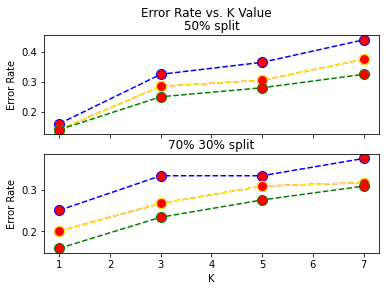

In [ ]:
fig, axs = plt.subplots(2)
axs[0].plot(k_values,Alpha11_ErrorRate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[0].plot(k_values,Alpha12_ErrorRate,color='red', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[0].plot(k_values,Alpha13_ErrorRate,color='yellow', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[0].plot(k_values,Alpha14_ErrorRate,color='green', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[0].set_title('50% split')
axs[1].plot(k_values,Alpha21_ErrorRate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[1].plot(k_values,Alpha22_ErrorRate,color='red', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[1].plot(k_values,Alpha23_ErrorRate,color='yellow', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[1].plot(k_values,Alpha24_ErrorRate,color='green', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[1].set_title('70% 30% split')
fig.suptitle('Error Rate vs. K Value')
for ax in axs.flat:
    ax.set(xlabel='K', ylabel='Error Rate')
for ax in axs.flat:
    ax.label_outer()

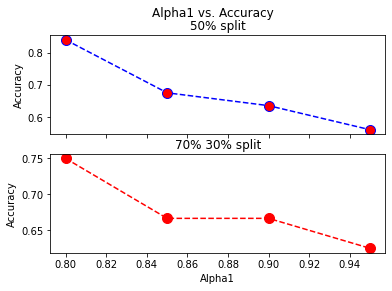

In [ ]:
# accuracy vs per alpha values
fig, axs = plt.subplots(2)
axs[0].plot([0.8,0.85,0.9,0.95],Alpha11_accuracy,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[1].plot([0.8,0.85,0.9,0.95],Alpha21_accuracy,color='red', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[0].set_title('50% split')
axs[1].set_title('70% 30% split')
fig.suptitle('Alpha1 vs. Accuracy')
for ax in axs.flat:
    ax.set(xlabel='Alpha1', ylabel='Accuracy')
for ax in axs.flat:
    ax.label_outer()

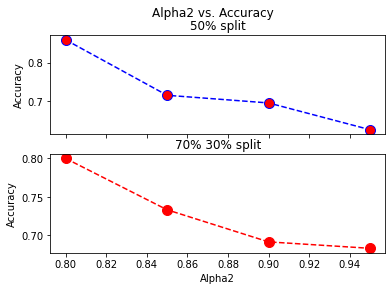

In [ ]:
# accuracy vs per alpha values
fig, axs = plt.subplots(2)
axs[0].plot([0.8,0.85,0.9,0.95],Alpha12_accuracy,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[1].plot([0.8,0.85,0.9,0.95],Alpha22_accuracy,color='red', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[0].set_title('50% split')
axs[1].set_title('70% 30% split')
fig.suptitle('Alpha2 vs. Accuracy')
for ax in axs.flat:
    ax.set(xlabel='Alpha2', ylabel='Accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

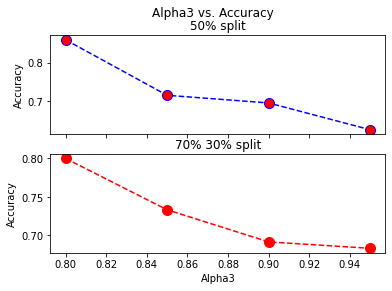

In [ ]:
# accuracy vs per alpha values
fig, axs = plt.subplots(2)
axs[0].plot([0.8,0.85,0.9,0.95],Alpha13_accuracy,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[1].plot([0.8,0.85,0.9,0.95],Alpha23_accuracy,color='red', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
fig.suptitle('Alpha3 vs. Accuracy')
for ax in axs.flat:
    ax.set(xlabel='Alpha3', ylabel='Accuracy')
axs[0].set_title('50% split')
axs[1].set_title('70% 30% split')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

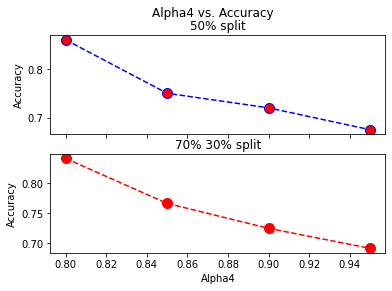

In [ ]:
# accuracy vs per alpha values
fig, axs = plt.subplots(2)
axs[0].plot([0.8,0.85,0.9,0.95],Alpha14_accuracy,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
axs[1].plot([0.8,0.85,0.9,0.95],Alpha24_accuracy,color='red', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
fig.suptitle('Alpha4 vs. Accuracy')
axs[0].set_title('50% split')
axs[1].set_title('70% 30% split')
for ax in axs.flat:
    ax.set(xlabel='Alpha4', ylabel='Accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()